<a href="https://colab.research.google.com/github/cabamarcos/VA_1/blob/main/pruebas_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image
from google.colab import files
import requests

In [120]:
from google.colab import drive
drive.mount('/content/drive')

import os
image_dir = "/content/drive/My Drive/imagesVA" # Change this to the correct path if needed

#Check if the directory exists
if not os.path.exists(image_dir):
  print(f"Error: Directory '{image_dir}' not found in your Google Drive.")
else:
  print(f"Successfully mounted Google Drive. Images directory: {image_dir}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully mounted Google Drive. Images directory: /content/drive/My Drive/imagesVA


In [121]:
# prompt: copy the folder in my space

import shutil
import os

# Replace 'source_folder' with the actual path of the folder you want to copy
# Replace 'destination_folder' with the desired location in your workspace
source_folder = '/content/drive/MyDrive/imagesVA'
destination_folder = '/content/images'

try:
    shutil.copytree(source_folder, destination_folder)
    print(f"Successfully copied '{source_folder}' to '{destination_folder}'")
except FileNotFoundError:
    print(f"Error: Source folder '{source_folder}' not found.")
except FileExistsError:
    print(f"Error: Destination folder '{destination_folder}' already exists.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: Destination folder '/content/images' already exists.


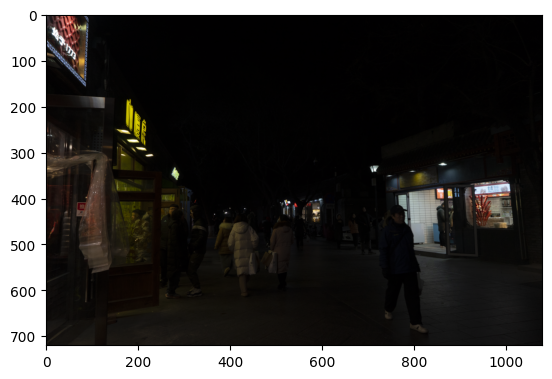

In [122]:
img = cv2.imread('images/2543.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

#Ajuste de brillo

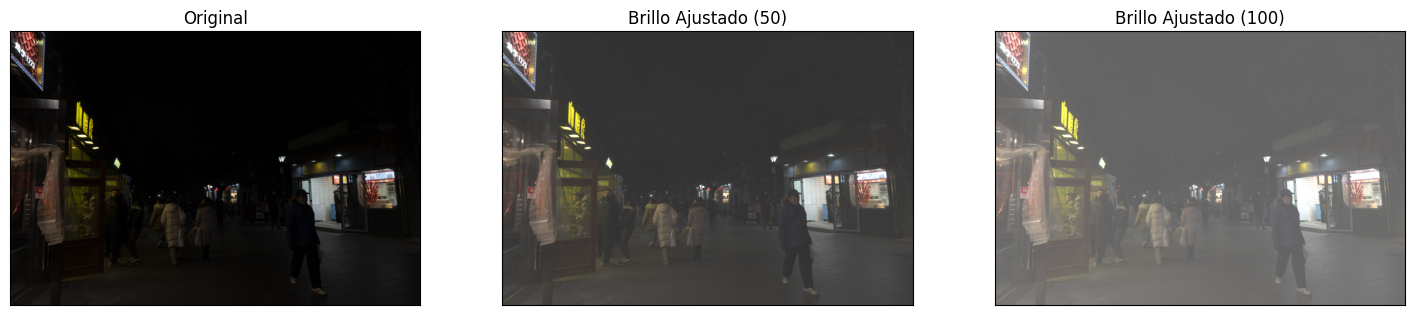

In [123]:
brillo = 50
brillo_ajustado = cv2.add(img, np.full(img.shape, brillo, dtype=np.uint8))
brillo = 100
brillo_ajustado_15 = cv2.add(img, np.full(img.shape, brillo, dtype=np.uint8))

# Crea una figura con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Ajusta el tamaño de la figura

# Muestra la imagen original
axes[0].imshow(img)
axes[0].set_title('Original')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Muestra la imagen con brillo ajustado
axes[1].imshow(brillo_ajustado)
axes[1].set_title('Brillo Ajustado (50)')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Muestra la imagen con brillo ajustado
axes[2].imshow(brillo_ajustado_15)
axes[2].set_title('Brillo Ajustado (100)')
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

 lo que estás modificando son los valores de intensidad de los píxeles en los tres canales de color (B, G, R) de la imagen.

 Como vemos, si es verdad que un poco de brillo hace que se vea mejor, pero mucho brillo hace que se saturen los píxeles, ya uqe llegan a un valor cercano a 255.

 Vamos a utilizar otras operaciones.


# Procesado del histograma


In [124]:
# Función para calcular y mostrar histograma y CDF
def mostrar_histograma_e_cdf(imagen, titulo):
    hist, bins = np.histogram(imagen.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(), bins=256, color='gray', alpha=0.9)
    plt.title(titulo)
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.legend(["CDF", "Histograma"])
    plt.show();

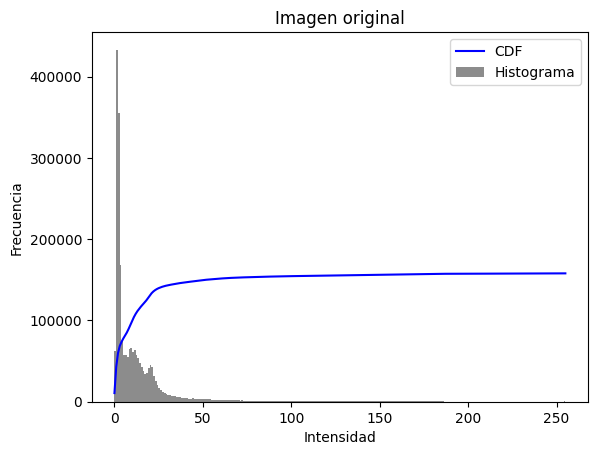

In [125]:
#grayscale
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
mostrar_histograma_e_cdf(gray_img, "Imagen original")

Como podemos ver tenemos una imagen que claramente es muy oscura ya que el 60% de los píxeles están en el quinto de valores más oscuros.

Para mejorar esta imagen, podremos hacer una ecualización del histograma, haciendo que los valores se repartan más equitativamente por el histograma.



## Ecualización del histograma


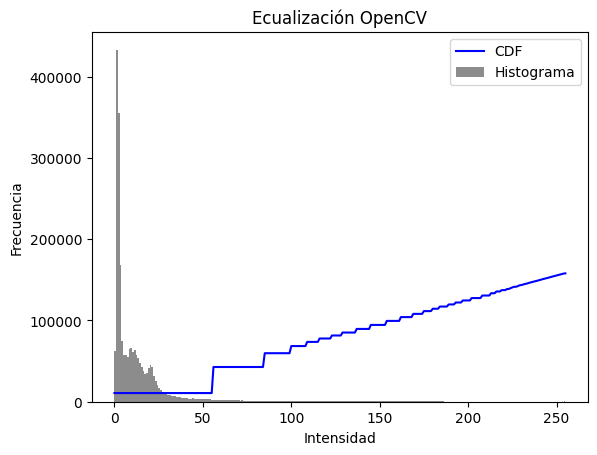

In [126]:
# Ecualizar la imagen utilizando OpenCV
equalized_image_cv2 = cv2.equalizeHist(gray_img)

mostrar_histograma_e_cdf(equalized_image_cv2, "Ecualización OpenCV")

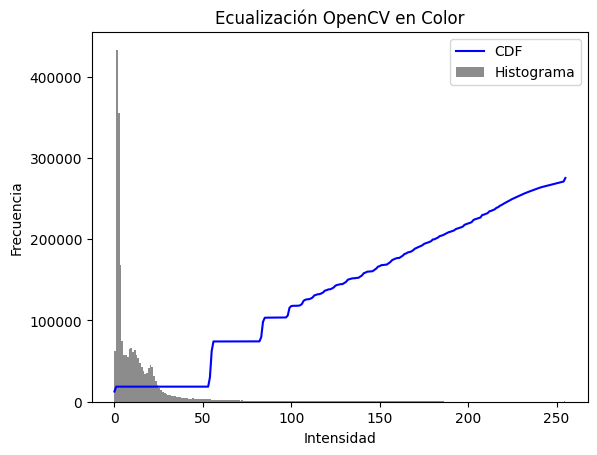

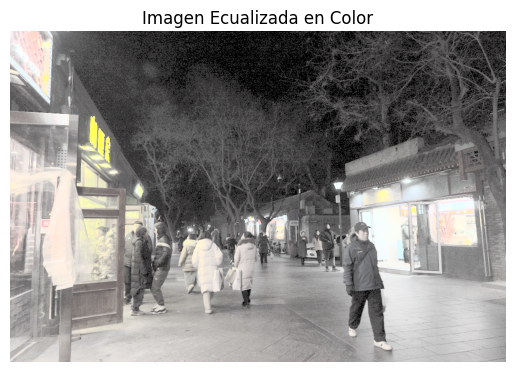

In [127]:
# Ecualizar la imagen utilizando OpenCV en cada canal de color
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # Convierte a YUV para ecualizar solo la luminancia (Y)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # Ecualiza el canal Y
equalized_image_cv2_color = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB) # Convierte de nuevo a RGB

mostrar_histograma_e_cdf(equalized_image_cv2_color, "Ecualización OpenCV en Color")

# Display the equalized image in color
plt.figure()
plt.imshow(equalized_image_cv2_color) # Muestra la imagen ecualizada en color
plt.title("Imagen Ecualizada en Color")
plt.axis('off')
plt.show()

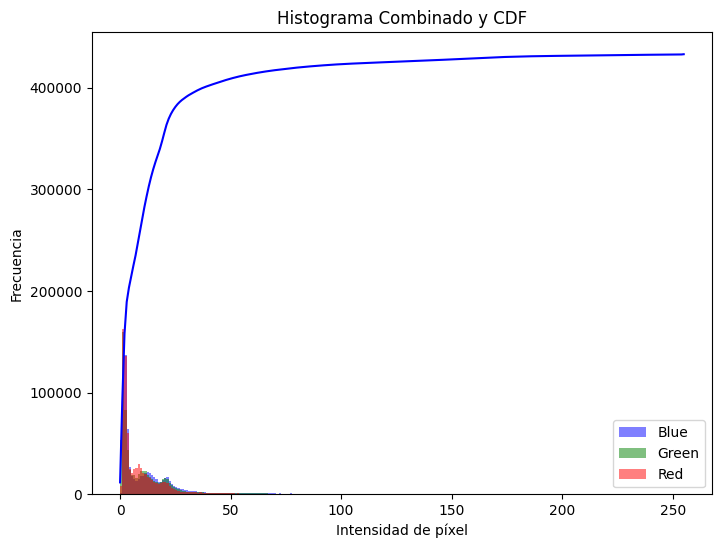

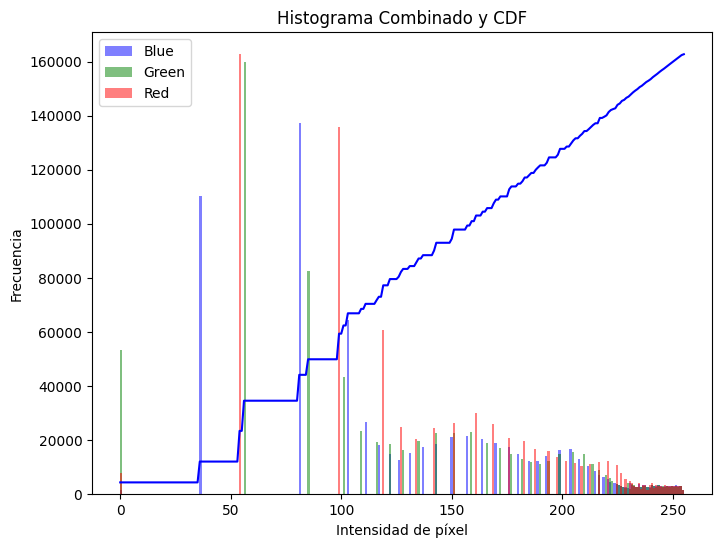

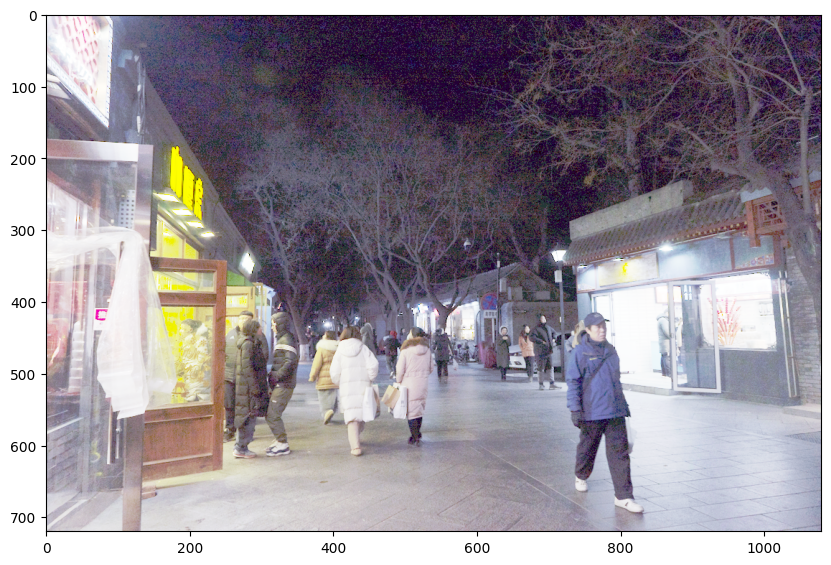

In [161]:
# Dividir la imagen en canales RGB
B, G, R = cv2.split(img)

def show_combined_histogram(B, G, R, img):
    plt.figure(figsize=(8, 6))

    # Histogramas combinados
    plt.hist(B.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
    plt.hist(G.ravel(), bins=256, color='green', alpha=0.5, label='Green')
    plt.hist(R.ravel(), bins=256, color='red', alpha=0.5, label='Red')

    # CDF global
    hist, bins = np.histogram(img.ravel(), bins=256, range=[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    plt.plot(cdf_normalized, color = 'b')


    plt.title('Histograma Combinado y CDF')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

# Mostrar los histogramas combinados
show_combined_histogram(B, G, R, img)
# Ecualizar cada canal
equ_B = cv2.equalizeHist(B)
equ_G = cv2.equalizeHist(G)
equ_R = cv2.equalizeHist(R)

equ_image = cv2.merge((equ_B, equ_G, equ_R))
show_combined_histogram(equ_B, equ_G, equ_R, equ_image)


# Combinar los canales ecualizados


plt.figure(figsize=(10, 8))
plt.imshow(equ_image)

Se puede observar que la imagen ha sido mejorada pero tiene mucho ruido. Además podemos ver que la imagen tiene saturación en las fuentes de luz.

Para mejorar estom vamos a usar CLAHE, ya que divide las imágenes en porciones, ecualizando de forma separada.

## CLAHE

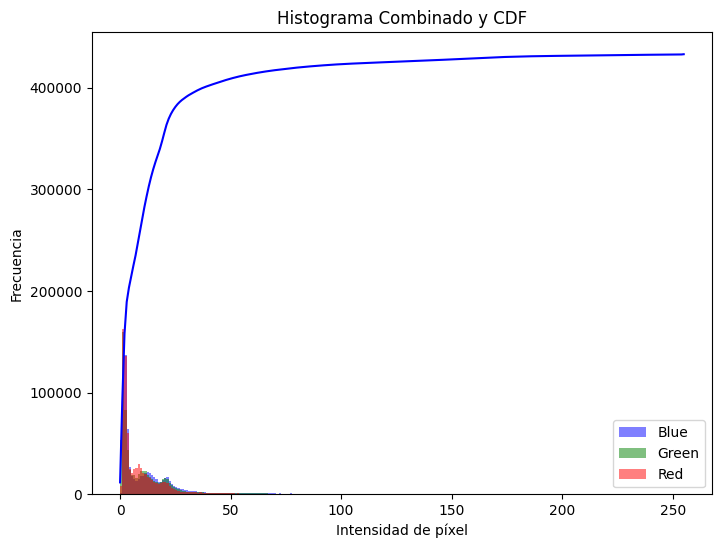

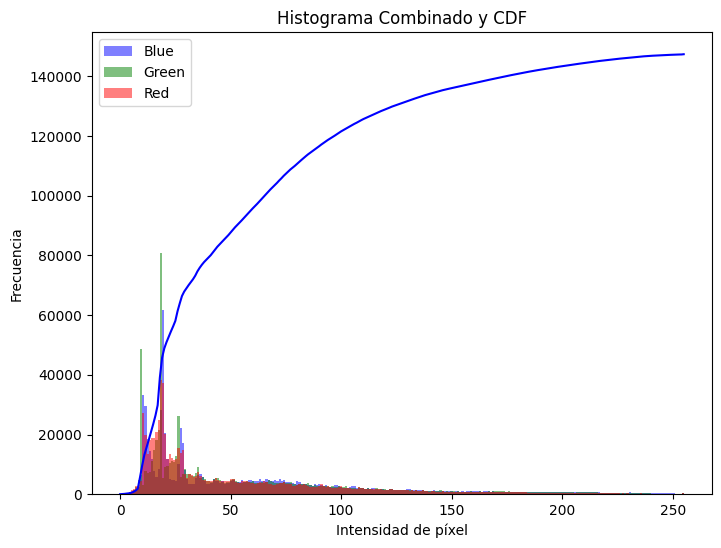

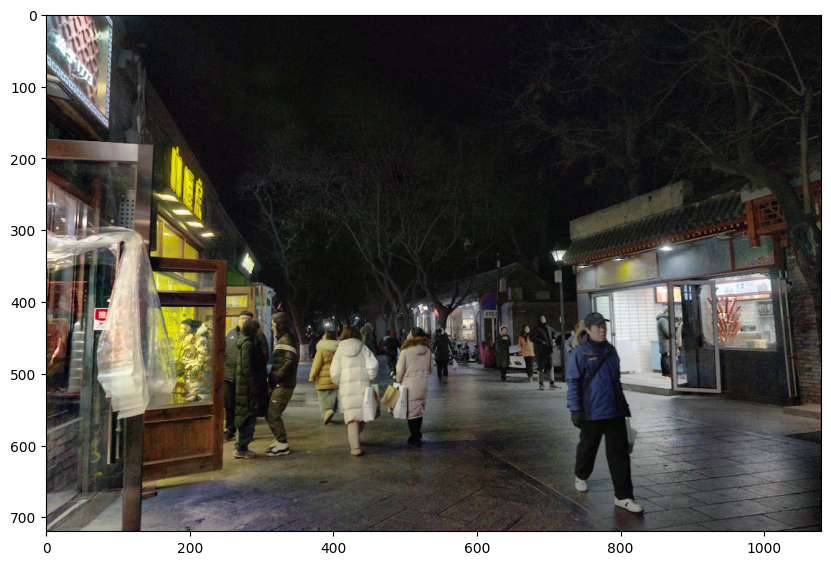

In [162]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Dividir la imagen en canales RGB
B, G, R = cv2.split(img)

# Mostrar los histogramas combinados
show_combined_histogram(B, G, R, img)

# Aplicar CLAHE a cada canal
clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8, 8))

clahe_B = clahe.apply(B)
clahe_G = clahe.apply(G)
clahe_R = clahe.apply(R)

clahe_image = cv2.merge((clahe_B, clahe_G, clahe_R))

# Mostrar histogramas ecualizados después de CLAHE
show_combined_histogram(clahe_B, clahe_G, clahe_R, clahe_image)

# Mostrar la imagen resultante de CLAHE
plt.figure(figsize=(10, 8))
plt.imshow(clahe_image)

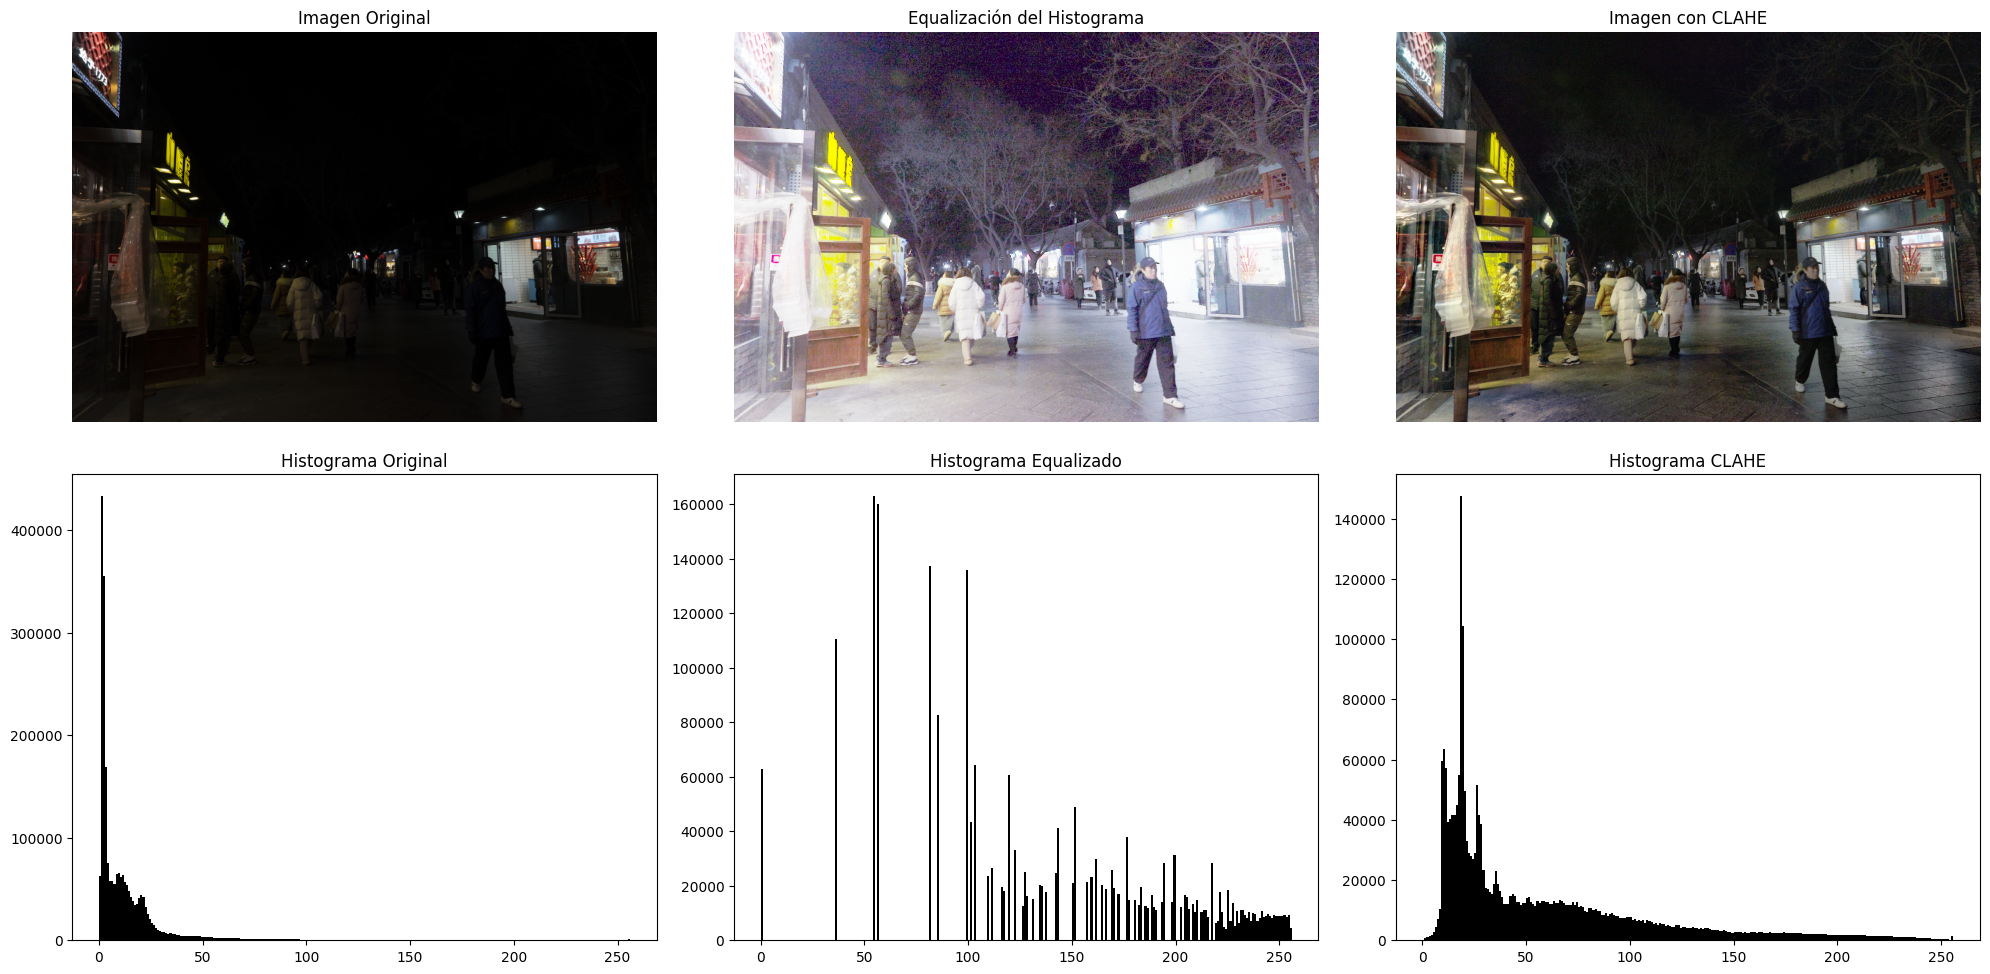

In [160]:
# Mostrar imágenes y sus histogramas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Imagen original
img = cv2.imread('images/2543.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axes[0, 0].imshow(img)
axes[0, 0].set_title("Imagen Original")
axes[0, 0].axis('off')
axes[1, 0].hist(img.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 0].set_title("Histograma Original")

# Imagen con equalización del histograma
axes[0, 1].imshow(equ_image, cmap='gray')
axes[0, 1].set_title("Equalización del Histograma")
axes[0, 1].axis('off')
axes[1, 1].hist(equ_image.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 1].set_title("Histograma Equalizado")

# Imagen con CLAHE

axes[0, 2].imshow(clahe_image, cmap='gray')
axes[0, 2].set_title("Imagen con CLAHE")
axes[0, 2].axis('off')
axes[1, 2].hist(clahe_image.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 2].set_title("Histograma CLAHE")

plt.tight_layout()
plt.show()

Aunque se ve mejor, vamos a probar otras formas

# GAMMA correction

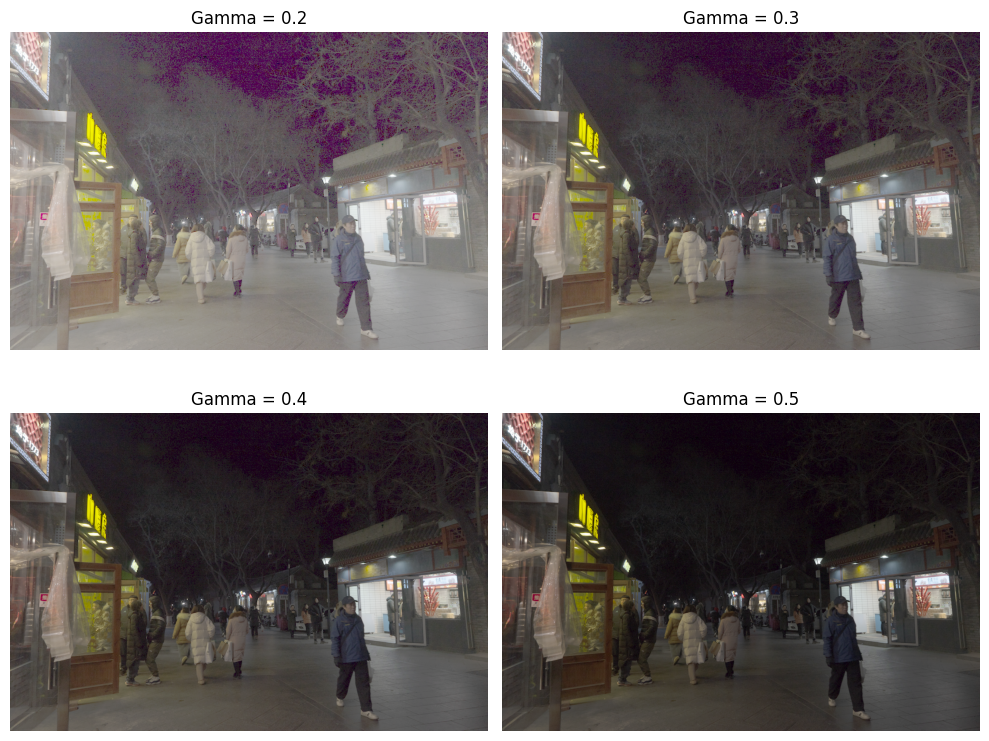

In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en color (BGR)
img = cv2.imread('images/2543.png')  # Ruta de tu imagen

# Verifica que la imagen se cargó correctamente
if img is None:
    print("Error al cargar la imagen.")
    exit()

# Convertir a RGB para visualizar correctamente en Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Lista de valores gamma a aplicar (solo 0.2, 0.3, y 0.4)
gamma_values = [0.2, 0.3, 0.4, 0.5]

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(10, 8))

# Mostrar la imagen original como la primera
plt.subplot(2, 2, 1)  # (n_filas, n_columnas, índice)
plt.title("Imagen Original")
# plt.imshow(img_rgb)
plt.axis('off')

# Normalizar la imagen al rango [0, 1] para realizar operaciones gamma
normalized_img = img_rgb / 255.0

# Aplicar corrección gamma y mostrar las imágenes transformadas
for i, gamma in enumerate(gamma_values, start=1):  # Comienza en el índice 2
    # Aplicar transformación gamma a cada canal de color
    gamma_corrected = np.power(normalized_img, gamma) * 255

    # Asegurarse de convertir el resultado a uint8
    gamma_corrected = gamma_corrected.astype(np.uint8)

    # Mostrar la imagen transformada en la cuadrícula
    plt.subplot(2, 2, i)  # (n_filas, n_columnas, índice)
    plt.title(f"Gamma = {gamma}")
    plt.imshow(gamma_corrected)
    plt.axis('off')

# Ajustar el diseño y mostrar las imágenes
plt.tight_layout()
plt.show()


Podemos ver que la imagen mejora bastante sin saturar ni quemar los píxeles en rangos de 0,4 y 0,5.

# Log transform

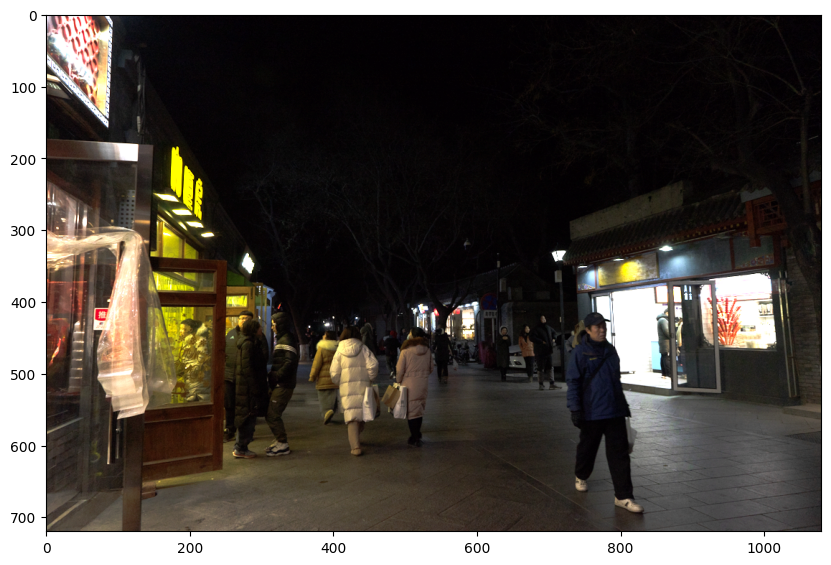

In [130]:
def adjust_brightness_log(img, c):
    """Ajusta el brillo de la imagen utilizando una función logarítmica."""
    img = img.astype(np.float32) / 255.0
    for i in range(3):
        img[:,:,i] = c * np.log(1 + img[:,:,i])
    img = np.clip(img, 0, 1) * 255
    img = img.astype(np.uint8)
    return img


img = cv2.imread('images/2543.png')  # Ruta de tu imagen
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

log_img = adjust_brightness_log(img, 4)

plt.figure(figsize=(10, 8))
plt.imshow(log_img)



Esta es la mejor imagen que hemos conseguido crear, ya que mantiene un buen contraste y no se satura toda la imagen. Lo malo es que las fuentes de luz se saturan un poco.

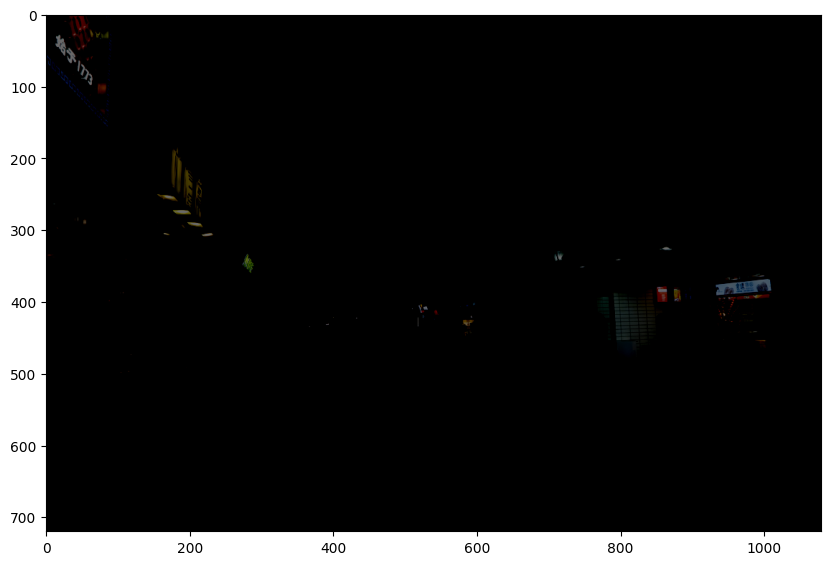

In [136]:
import cv2

# Reducir el brillo restando un valor a todos los píxeles
brightness_reduction = 150  # Valor de reducción, ajusta según necesites
dim_image = cv2.subtract(img, (brightness_reduction, brightness_reduction, brightness_reduction))

plt.figure(figsize=(10, 8))
plt.imshow(dim_image)

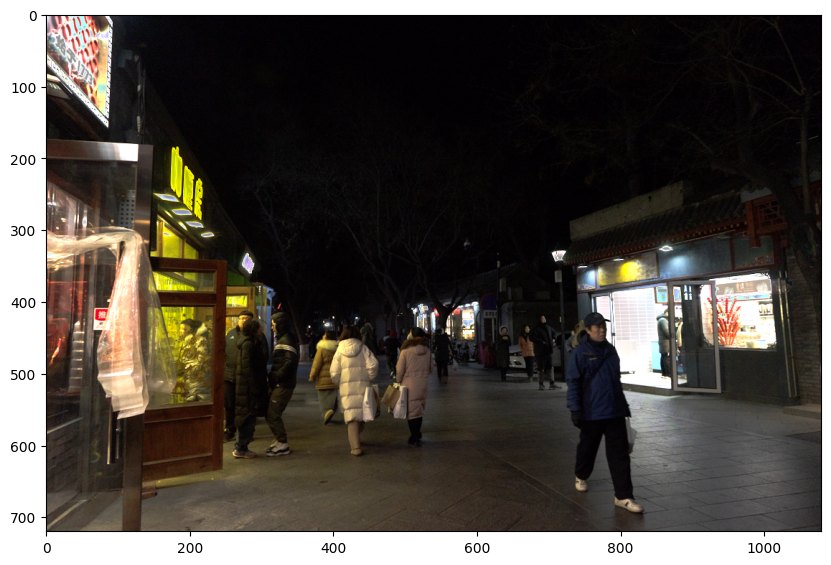

In [137]:
result = cv2.subtract(log_img, dim_image)

plt.figure(figsize=(10, 8))
plt.imshow(result)

In [134]:
# prompt: comprobar si la imagen  result tiene pixeles negativos

# Check for negative pixel values in the 'result' image
has_negative_pixels = np.any(result < 0)

if has_negative_pixels:
    print("The 'result' image contains negative pixel values.")
    # Optionally, you can print the number of negative pixels:
    negative_pixel_count = np.sum(result < 0)
    print(f"Number of negative pixels: {negative_pixel_count}")
else:
    print("The 'result' image does not contain negative pixel values.")

The 'result' image does not contain negative pixel values.


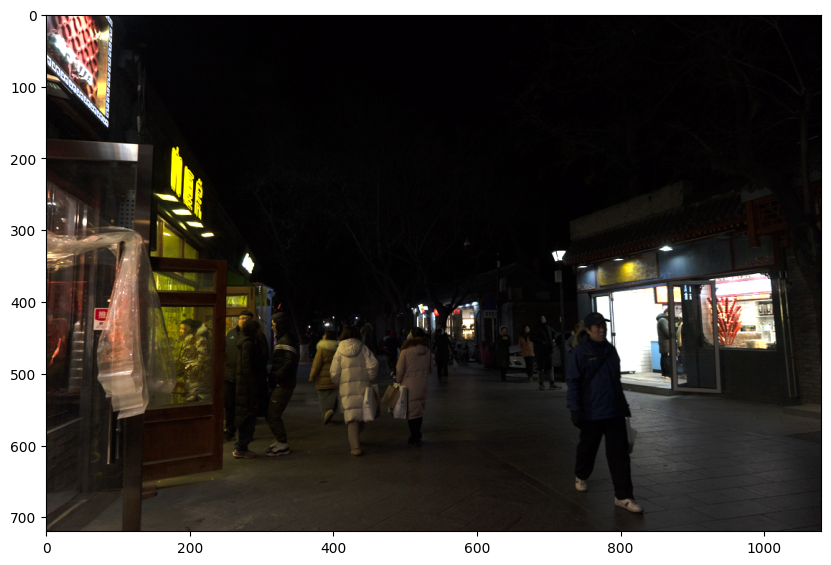

In [141]:
img = cv2.imread('images/2543.png')  # Ruta de tu imagen
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

factor = 2.2

image_clipped = np.clip(img * factor, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 8))
plt.imshow(image_clipped)